In [1]:
from function import *

In [2]:
def input_coin():   
    coin1 = input("What is a coin you would like to compare")
    coin1 = coin1.lower()
    return coin1

In [3]:
def unix_time(year, month, day, hour, second):
    date_time = datetime.datetime(year, month, day, hour, second)
    return time.mktime(date_time.timetuple())

def input_start_date():
    start_year = input("What is the year of the starting date you wish to analyze?")
    start_month =  input("What is the month of the starting date you wish to analyze?")
    start_day =input("What is the day of the starting date you wish to analyze?")
    
    start = unix_time(int(start_year),int(start_month),int(start_day),0,0)
    return start

    
def input_end_date():
    end_year = input("What is the year of the end date you wish to analyze?")
    end_month = input("What is the month of the end date you wish to analyze?")
    end_day = input("What is the day of the end date you wish to analyze?")
    end =  unix_time(int(end_year),int(end_month),int(end_day),0,0)
    return end


In [4]:
def main():
    # Getting input for specific coins/ dates
    query = input("What analysis results would you like? options: monte carlo, sharpe ratio, correlation, trading info")
   
    
    if query == "monte carlo":
        start = input_start_date()
        end = input_end_date()
        coin1 = input_coin()
        coin2 = input_coin()
        monte_carlo(start,end,coin1)
        monte_carlo(start,end,coin2)
    elif query == "sharpe ratio":
        start = input_start_date()
        end = input_end_date()
        coin1 = input_coin()
        coin2 = input_coin()
        coin3 = input_coin()
        coin4 = input_coin()
        coin5 = input_coin()
        sharpe_ratio(start,end,coin1,coin2,coin3,coin4,coin5)
    elif query == "correlation":
        start = input_start_date()
        end = input_end_date()
        coin1 = input_coin()
        coin2 = input_coin()
        heatmap(start,end,coin1,coin2)
    elif query == "trading info":
        start = input_start_date()
        end = input_end_date()
        coin1 = input_coin()
        coin2 = input_coin()
        calc_exchange_ratio(start,end,coin1,coin2)
        graph_trading_volumes(start,end,coin1,coin2)
        graph_market_cap(start,end,coin1,coin2)
    else:
        print("invalid entry. Please try again.")
        

What analysis results would you like? options: monte carlo, sharpe ratio, correlation, trading info correlation
What is the year of the starting date you wish to analyze? 2018
What is the month of the starting date you wish to analyze? 2
What is the day of the starting date you wish to analyze? 2
What is the year of the end date you wish to analyze? 2020
What is the month of the end date you wish to analyze? 2
What is the day of the end date you wish to analyze? 2
What is a coin you would like to compare bitcoin
What is a coin you would like to compare dogecoin


<AxesSubplot:>

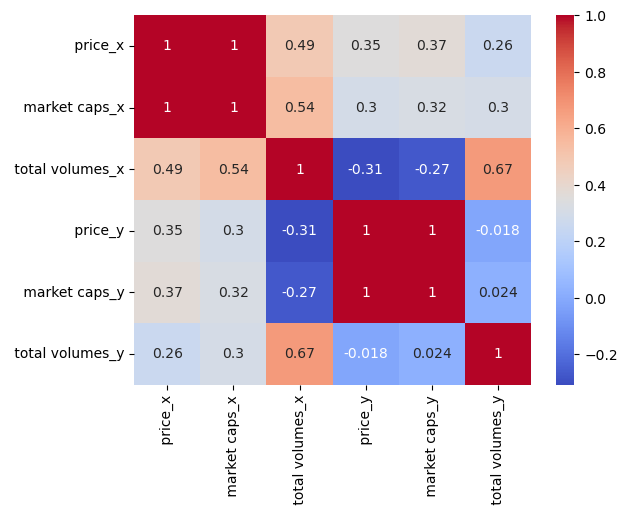

In [5]:
main()